# SeaIce-Prediction

### Introduction
Measurement of sea ice is important for safety of navigation and for monitoring the environment, particularly the climate. Sea ice extent interacts with large climate patterns such as the North Atlantic oscillation and Atlantic Multidecadal Oscillation, to name just two, and influences climate in the rest of the globe.  
The amount of sea ice coverage in the arctic has been of interest for centuries, as the Northwest Passage was of high interest for trade and seafaring. There is a longstanding history of records and measurements of some effects of the sea ice extent, but comprehensive measurements were sparse till the 1950s and started with the satellite era in the late 1970s. Modern direct records include data about ice extent, ice area, concentration, thickness, and the age of the ice.  

### Importance of seaice for the polar bears  
...  

Because of the polarbears we focus on the northern hemisphere

### Dataset  
The used data can be found on https://nsidc.org/ splitted in different datasets depending on the topic you wants to focus on e.g. a dataset for the whole northern hemisphere on a daily or monthly basis or another dataset showing the seaice-extent of each region in the northern hemisphere

#### Let's start

In [1]:
#import of the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftplib import FTP
import os
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

## Data on daily basis

#### Loading the daily data for seaice extent  
to load the data you can connect to the ftp client on the website. The code for that can be copied here: https://nsidc.org/support/64231694-FTP-Client-Data-Access or have a look on the 'getting_data' notebook

##### Exploring the data

In [2]:
df_n = pd.read_csv('../data/N_seaice_extent_daily_v3.0.csv')
df_n.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [3]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          14187 non-null  object
 1    Month        14187 non-null  object
 2    Day          14187 non-null  object
 3        Extent   14187 non-null  object
 4       Missing   14187 non-null  object
 5    Source Data  14187 non-null  object
dtypes: object(6)
memory usage: 665.1+ KB


In [4]:
df_n.shape

(14187, 6)

We can see that we have 6 columns with about 14000 rows. All of them are object type, so before going further we have to do some changes.  
First of all we drop the first row because it is the description but we have to keep in mind that the values for the extent and for the missing have to be multiplied with 10^6.  
We can also drop the Source Data column.

In [5]:
#drop first row because it's the description
df_n = df_n.iloc[1:,:]

#drop Source Data column
df_n.drop(' Source Data', axis=1, inplace=True)
df_n.head()

,Year,Month,Day,Extent,Missing
1,1978,10,26,10.231,0.000
2,1978,10,28,10.420,0.000
3,1978,10,30,10.557,0.000
4,1978,11,01,10.670,0.000
5,1978,11,03,10.777,0.000


In [6]:
df_n.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing'], dtype='object')

Now we rename the columns in a more pythonic way

In [7]:
df_n.rename(columns={'Year':'year', ' Month':'month', ' Day':'day', '     Extent':'extent', '    Missing':'missing'}, inplace=True)
df_n.head()

,year,month,day,extent,missing
1,1978,10,26,10.231,0.000
2,1978,10,28,10.420,0.000
3,1978,10,30,10.557,0.000
4,1978,11,01,10.670,0.000
5,1978,11,03,10.777,0.000


In [8]:
#change the date columns to pd.to_datetime
df_n['date'] = pd.to_datetime(df_n[['year', 'month', 'day']])
df_n.head()

,year,month,day,extent,missing,date
1,1978,10,26,10.231,0.000,1978-10-26
2,1978,10,28,10.420,0.000,1978-10-28
3,1978,10,30,10.557,0.000,1978-10-30
4,1978,11,01,10.670,0.000,1978-11-01
5,1978,11,03,10.777,0.000,1978-11-03


now we have to change the entries for extent and missing into numbers

In [9]:
#change type
df_n[['extent','missing']] = df_n[['extent','missing']].astype(float)
df_n[['extent','missing']] *=1000000
df_n.head()

,year,month,day,extent,missing,date
1,1978,10,26,10231000.0,0.0,1978-10-26
2,1978,10,28,10420000.0,0.0,1978-10-28
3,1978,10,30,10557000.0,0.0,1978-10-30
4,1978,11,01,10670000.0,0.0,1978-11-01
5,1978,11,03,10777000.0,0.0,1978-11-03


#### plotting the data

In [10]:
#general plot settings
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)
plt.rc('figure',figsize=(16, 9)) 
plt.rcParams['axes.labelweight'] = 'bold'


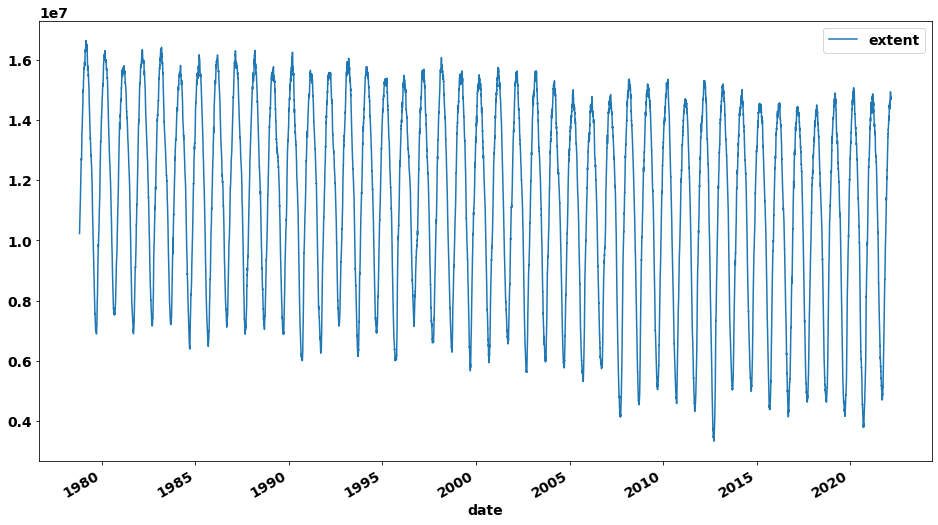

In [11]:
df_n.plot(x='date', y='extent');

### Monthly Data  
there is also data available on a monthly basis. it shows the average for each month not only for the seaice-extent but also for the seaice-area.  
difference between extent and area!!!

In [12]:
# NSIDC monthly Sea ice extent, 25 km resolution, Northern hemisphere
# the data is in separate csv.-file for each month
# creating a complete unsorted csv.-file

import glob

path = r'../data/n_monthly' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame.tail()

,year,mo,data-type,region,extent,area
515,2017,6,Goddard,N,10.76,8.63
516,2018,6,Goddard,N,10.78,8.79
517,2019,6,Goddard,N,10.59,8.32
518,2020,6,Goddard,N,10.59,8.41
519,2021,6,NRTSI-G,N,10.71,8.38


In [13]:
frame.columns

Index(['year', ' mo', '    data-type', ' region', ' extent', '   area'], dtype='object')

In [14]:
#rename the columns because of spaces in front
frame.rename(columns={' mo':'month', '    data-type':'data_type', ' region':'region', ' extent':'extent', '   area':'area'}, inplace=True)

In [15]:
# add a column for the day
frame['day'] = 1
frame.head()

,year,month,data_type,region,extent,area,day
0,1979,3,Goddard,N,16.34,13.21,1
1,1980,3,Goddard,N,16.04,12.99,1
2,1981,3,Goddard,N,15.63,12.71,1
3,1982,3,Goddard,N,16.04,13.07,1
4,1983,3,Goddard,N,16.09,12.93,1


In [16]:
#create a datetime
frame['date'] = pd.to_datetime(frame[['year', 'month', 'day']])
frame.head()

,year,month,data_type,region,extent,area,day,date
0,1979,3,Goddard,N,16.34,13.21,1,1979-03-01
1,1980,3,Goddard,N,16.04,12.99,1,1980-03-01
2,1981,3,Goddard,N,15.63,12.71,1,1981-03-01
3,1982,3,Goddard,N,16.04,13.07,1,1982-03-01
4,1983,3,Goddard,N,16.09,12.93,1,1983-03-01


In [17]:
#sorting by date and reset the index
frame.sort_values(by='date', inplace=True)
frame = frame.reset_index(drop=True)
frame.head()

,year,month,data_type,region,extent,area,day,date
0,1978,11,Goddard,N,11.65,9.04,1,1978-11-01
1,1978,12,Goddard,N,13.67,10.90,1,1978-12-01
2,1979,1,Goddard,N,15.41,12.41,1,1979-01-01
3,1979,2,Goddard,N,16.18,13.18,1,1979-02-01
4,1979,3,Goddard,N,16.34,13.21,1,1979-03-01


In [18]:
#resort and rename dataframe
df_month = frame[['date','data_type','region','extent','area','year','month']]
df_month.head()

,date,data_type,region,extent,area,year,month
0,1978-11-01,Goddard,N,11.65,9.04,1978,11
1,1978-12-01,Goddard,N,13.67,10.90,1978,12
2,1979-01-01,Goddard,N,15.41,12.41,1979,1
3,1979-02-01,Goddard,N,16.18,13.18,1979,2
4,1979-03-01,Goddard,N,16.34,13.21,1979,3


In [19]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       520 non-null    datetime64[ns]
 1   data_type  520 non-null    object        
 2   region     520 non-null    object        
 3   extent     520 non-null    float64       
 4   area       520 non-null    float64       
 5   year       520 non-null    int64         
 6   month      520 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 28.6+ KB


In [20]:
df_month.describe()

,extent,area,year,month
count,520.000000,520.000000,520.000000,520.000000
mean,-27.110231,-48.453846,2000.000000,6.500000
std,620.228247,758.724674,12.523581,3.470215
min,-9999.000000,-9999.000000,1978.000000,1.000000
25%,8.547500,6.227500,1989.000000,3.000000
50%,12.060000,9.930000,2000.000000,6.500000
75%,14.300000,12.282500,2011.000000,10.000000
max,16.340000,13.900000,2022.000000,12.000000


In [21]:
#although there are no missing values there are min values of -9999 in the extent and area column
#replacing the -9999 values in extent and area with the value of the year before

for index, val in enumerate(df_month['extent']):
    if val == -9999:
        df_month['extent'].loc[index] = df_month['extent'].loc[index - 12]

for index, val in enumerate(df_month['area']):
    if val == -9999:
        df_month['area'].loc[index] = df_month['area'].loc[index - 12]  

In [22]:
#multiplying with 10^6
df_month[['extent','area']] *=1000000
df_month.head()

,date,data_type,region,extent,area,year,month
0,1978-11-01,Goddard,N,11650000.0,9040000.0,1978,11
1,1978-12-01,Goddard,N,13670000.0,10900000.0,1978,12
2,1979-01-01,Goddard,N,15410000.0,12410000.0,1979,1
3,1979-02-01,Goddard,N,16180000.0,13180000.0,1979,2
4,1979-03-01,Goddard,N,16340000.0,13210000.0,1979,3


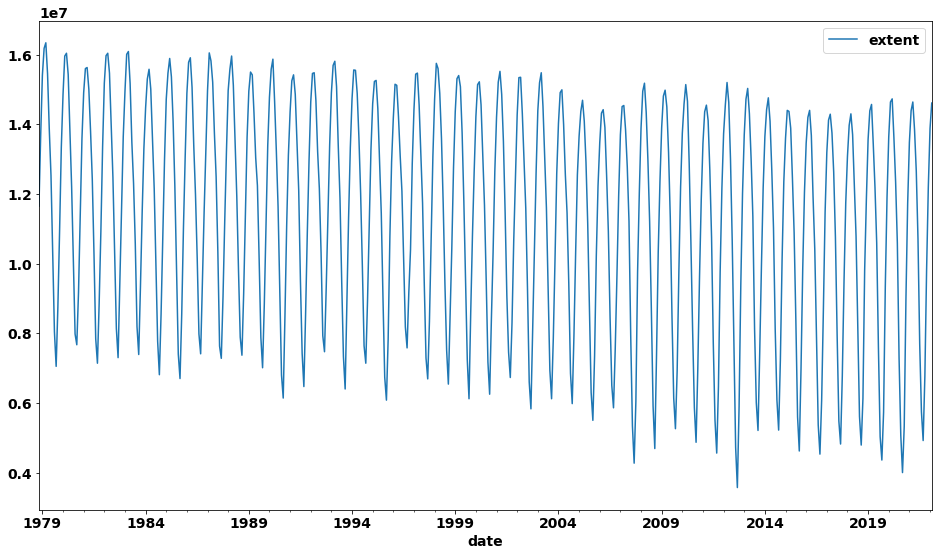

In [23]:
df_month.plot(x='date', y='extent');

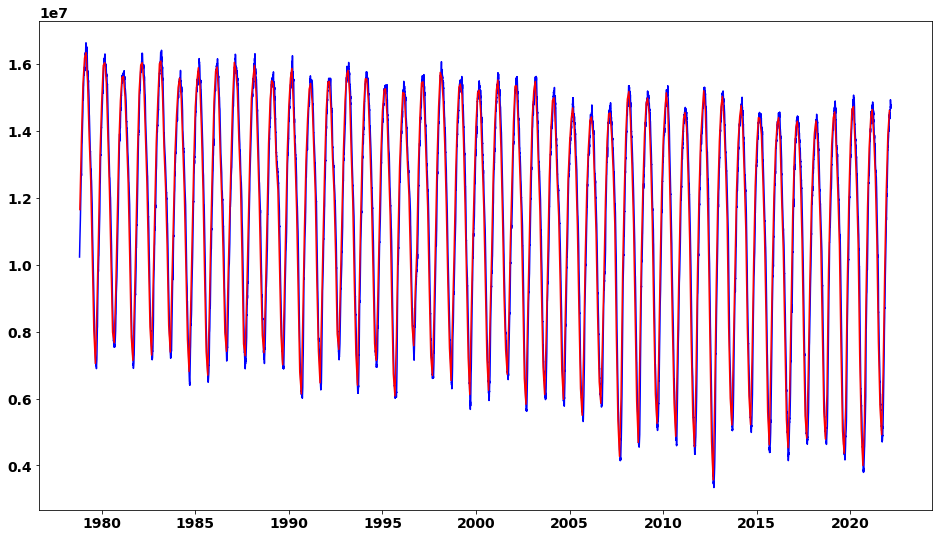

In [24]:
#comparing daily data with monthly data
plt.plot(df_n['date'], df_n['extent'], 'b', df_month['date'], df_month['extent'], 'r');
#legend!

#### Masie-Data

The Multisensor Analyzed Sea Ice Extent - Northern Hemisphere (MASIE-NH) products provide measurements of daily sea ice extent and sea ice edge boundary for the Northern Hemisphere and 16 Arctic regions in a polar stereographic projection at both 1 km and 4 km grid cell sizes.

In [25]:
df_masie4 = pd.read_csv('../data/masie_4km_allyears_extent_sqkm.csv')
df_masie4.head()

,yyyyddd,(0) Northern_Hemisphere,(1) Beaufort_Sea,(2) Chukchi_Sea,(3) East_Siberian_Sea,(4) Laptev_Sea,(5) Kara_Sea,(6) Barents_Sea,(7) Greenland_Sea,(8) Baffin_Bay_Gulf_of_St._Lawrence,(9) Canadian_Archipelago,(10) Hudson_Bay,(11) Central_Arctic,(12) Bering_Sea,(13) Baltic_Sea,(14) Sea_of_Okhotsk,(15) Yellow_Sea,(16) Cook_Inlet
0,2006001,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96
1,2006002,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96
2,2006003,13170663.24,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,595342.42,855907.47,852715.31,1260779.00,3240507.71,666030.40,11408.53,311943.21,12152.54,6420.96
3,2006004,13409715.53,1069710.81,966006.16,1087102.72,897773.37,906439.04,458823.88,605747.86,980253.85,852715.31,1260779.00,3240326.47,683780.08,11408.53,372868.02,6989.96,6420.96
4,2006005,13416779.12,1069710.81,966006.16,1087102.72,897773.37,908697.29,474574.82,600826.71,970631.09,852715.31,1260779.00,3240326.47,683795.38,21311.46,363515.34,8240.73,8202.95


In [26]:
df_masie4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   yyyyddd                               5865 non-null   int64  
 1    (0) Northern_Hemisphere              5865 non-null   float64
 2    (1) Beaufort_Sea                     5865 non-null   float64
 3    (2) Chukchi_Sea                      5865 non-null   float64
 4    (3) East_Siberian_Sea                5865 non-null   float64
 5    (4) Laptev_Sea                       5865 non-null   float64
 6    (5) Kara_Sea                         5865 non-null   float64
 7    (6) Barents_Sea                      5865 non-null   float64
 8    (7) Greenland_Sea                    5865 non-null   float64
 9    (8) Baffin_Bay_Gulf_of_St._Lawrence  5865 non-null   float64
 10   (9) Canadian_Archipelago             5865 non-null   float64
 11   (10) Hudson_Bay 

In [27]:
df_masie4.columns

Index(['yyyyddd', ' (0) Northern_Hemisphere', ' (1) Beaufort_Sea',
       ' (2) Chukchi_Sea', ' (3) East_Siberian_Sea', ' (4) Laptev_Sea',
       ' (5) Kara_Sea', ' (6) Barents_Sea', ' (7) Greenland_Sea',
       ' (8) Baffin_Bay_Gulf_of_St._Lawrence', ' (9) Canadian_Archipelago',
       ' (10) Hudson_Bay', ' (11) Central_Arctic', ' (12) Bering_Sea',
       ' (13) Baltic_Sea', ' (14) Sea_of_Okhotsk', ' (15) Yellow_Sea',
       ' (16) Cook_Inlet'],
      dtype='object')

In [28]:
#renaming the columns to get rid of the empty spaces in front of the name
df_masie4.rename(columns={' (0) Northern_Hemisphere':'Northern_Hemisphere', ' (1) Beaufort_Sea':'Beaufort_Sea(1)',
       ' (2) Chukchi_Sea':'Chukchi_Sea(2)', ' (3) East_Siberian_Sea':'East_Siberian_Sea(3)', ' (4) Laptev_Sea':'Laptev_Sea(4)',
       ' (5) Kara_Sea':'Kara_Sea(5)', ' (6) Barents_Sea':'Barents_Sea(6)', ' (7) Greenland_Sea':'Greenland_Sea(7)',
       ' (8) Baffin_Bay_Gulf_of_St._Lawrence':'Baffin_Bay_Gulf_of_St._Lawrence(8)', ' (9) Canadian_Archipelago':'Canadian_Archipelago(9)',
       ' (10) Hudson_Bay':'Hudson_Bay(10)', ' (11) Central_Arctic':'Central_Arctic(11)', ' (12) Bering_Sea':'Bering_Sea(12)',
       ' (13) Baltic_Sea':'Baltic_Sea(13)', ' (14) Sea_of_Okhotsk':'Sea_of_Okhotsk(14)', ' (15) Yellow_Sea':'Yellow_Sea(15)',
       ' (16) Cook_Inlet':'Cook_Inlet(16)'}, inplace=True)

df_masie4.head(1)


,yyyyddd,Northern_Hemisphere,Beaufort_Sea(1),Chukchi_Sea(2),East_Siberian_Sea(3),Laptev_Sea(4),Kara_Sea(5),Barents_Sea(6),Greenland_Sea(7),Baffin_Bay_Gulf_of_St._Lawrence(8),Canadian_Archipelago(9),Hudson_Bay(10),Central_Arctic(11),Bering_Sea(12),Baltic_Sea(13),Sea_of_Okhotsk(14),Yellow_Sea(15),Cook_Inlet(16)
0,2006001,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96


In [29]:
#splitting the column for the date in year and day_of_year
li_year = []
li_day = []
for i in range(0, len(df_masie4['yyyyddd'])):
    day_year = str(df_masie4['yyyyddd'][i])
    li_day.append(int(day_year[-3:])) 
    li_year.append(int(day_year[:4]))
    
df_masie4 = df_masie4.assign(year = li_year, doy = li_day) 

#creating a datetime column
li_date = []
for i in range(0, len(df_masie4['doy'])):
    li_date.append(pd.to_datetime(df_masie4['doy'][i]-1, unit='D', origin=str(df_masie4['year'][i])))

df_masie4 = df_masie4.assign(date = li_date)
df_masie4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   yyyyddd                             5865 non-null   int64         
 1   Northern_Hemisphere                 5865 non-null   float64       
 2   Beaufort_Sea(1)                     5865 non-null   float64       
 3   Chukchi_Sea(2)                      5865 non-null   float64       
 4   East_Siberian_Sea(3)                5865 non-null   float64       
 5   Laptev_Sea(4)                       5865 non-null   float64       
 6   Kara_Sea(5)                         5865 non-null   float64       
 7   Barents_Sea(6)                      5865 non-null   float64       
 8   Greenland_Sea(7)                    5865 non-null   float64       
 9   Baffin_Bay_Gulf_of_St._Lawrence(8)  5865 non-null   float64       
 10  Canadian_Archipelago(9) 

#### comparing higher resolution (df_masie4) with lower resolution (df_n (25km grid))

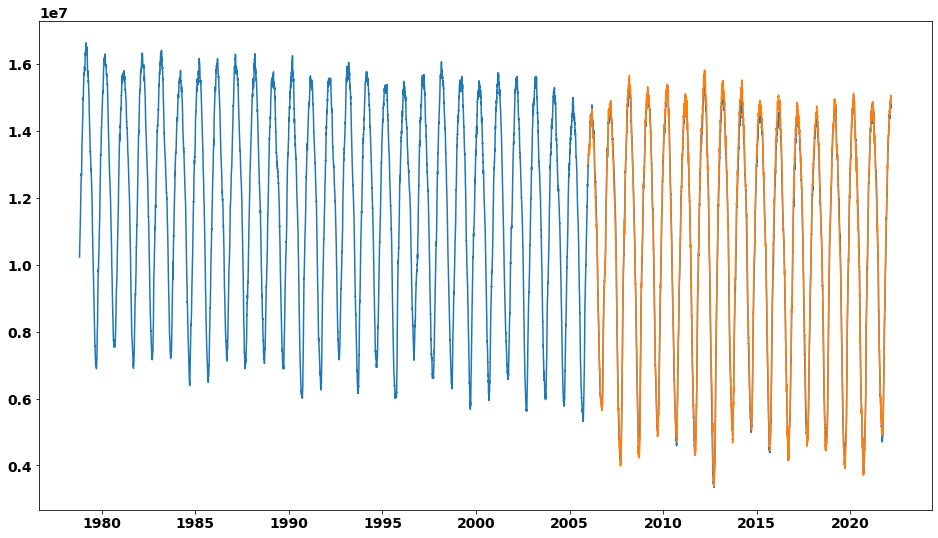

In [30]:
plt.plot(df_n['date'], df_n['extent'])
plt.plot(df_masie4['date'], df_masie4['Northern_Hemisphere'])

#### comparing the regions

Our dataset consist of the data of different regions in the northern hemisphere. see List below

![image](../images/landmask_with_regions_countries.png)

In [31]:
region_list = df_masie4.columns[2:-4].to_list()
print(region_list)

['Beaufort_Sea(1)', 'Chukchi_Sea(2)', 'East_Siberian_Sea(3)', 'Laptev_Sea(4)', 'Kara_Sea(5)', 'Barents_Sea(6)', 'Greenland_Sea(7)', 'Baffin_Bay_Gulf_of_St._Lawrence(8)', 'Canadian_Archipelago(9)', 'Hudson_Bay(10)', 'Central_Arctic(11)', 'Bering_Sea(12)', 'Baltic_Sea(13)', 'Sea_of_Okhotsk(14)', 'Yellow_Sea(15)']


In [32]:
dict_colours = {'1':'#48D1CC', '2':'#32CD32', '3':'#E6E6FA', 
                '4':'#FF6347', '5':'#4682B4', '6':'#8A2BE2', 
                '7':'#ADFF2F', '8':'#0000CD', '9': '#FFB6C1', 
                '10':'#FFA500', '11':'#FFFFE0', '12':'#FFFACD', 
                '13':'#32CD32', '14':'#800080', '15':'#FFFF00',
                 '16':'#9370DB'}

to see if there is different behaviour for the individual regions (decreasing or increasing the ice extent) we compare them 

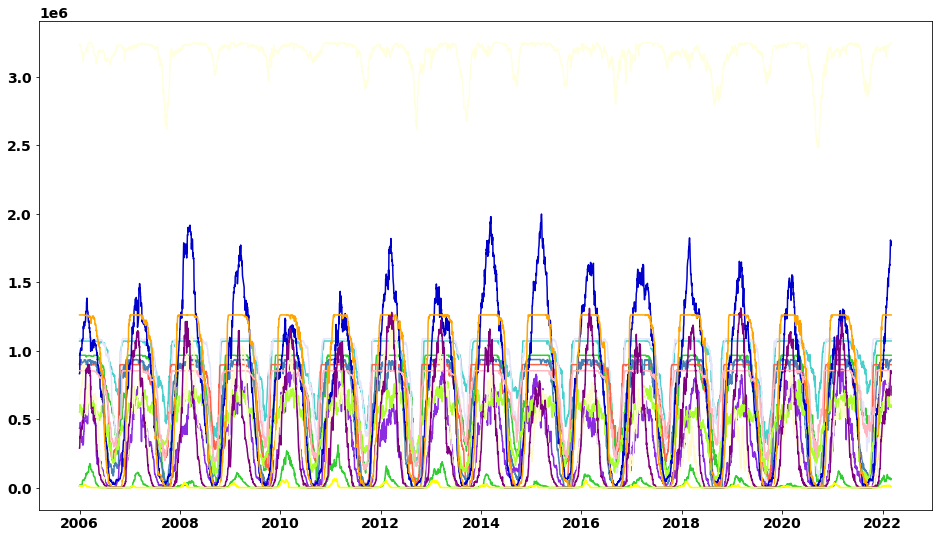

In [33]:
for index, region in enumerate(region_list):
    plt.plot(df_masie4['date'], df_masie4[region], color=dict_colours[str(index+1)])

In [34]:
df_masie4.columns

Index(['yyyyddd', 'Northern_Hemisphere', 'Beaufort_Sea(1)', 'Chukchi_Sea(2)',
       'East_Siberian_Sea(3)', 'Laptev_Sea(4)', 'Kara_Sea(5)',
       'Barents_Sea(6)', 'Greenland_Sea(7)',
       'Baffin_Bay_Gulf_of_St._Lawrence(8)', 'Canadian_Archipelago(9)',
       'Hudson_Bay(10)', 'Central_Arctic(11)', 'Bering_Sea(12)',
       'Baltic_Sea(13)', 'Sea_of_Okhotsk(14)', 'Yellow_Sea(15)',
       'Cook_Inlet(16)', 'year', 'doy', 'date'],
      dtype='object')

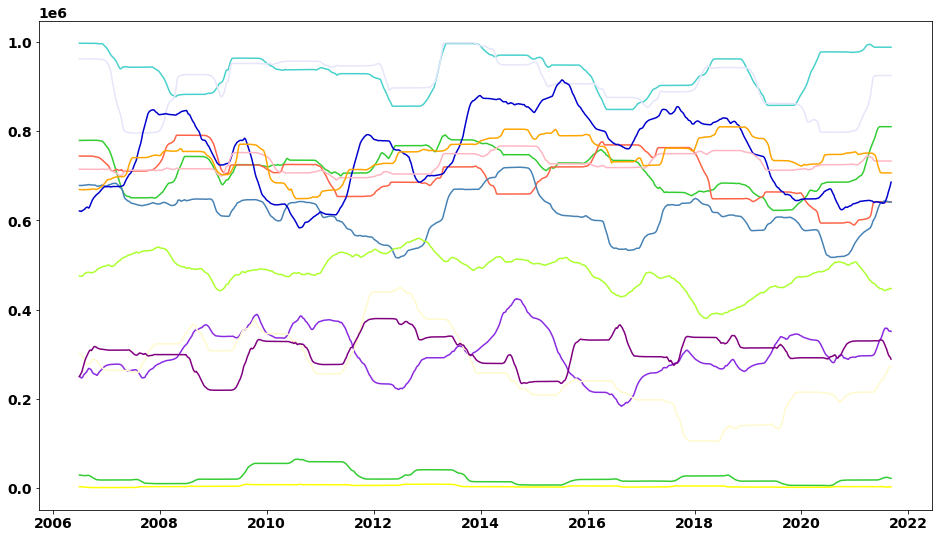

In [35]:
smooth_df_masie4 = df_masie4[['yyyyddd', 'Northern_Hemisphere', 'Beaufort_Sea(1)', 'Chukchi_Sea(2)',
       'East_Siberian_Sea(3)', 'Laptev_Sea(4)', 'Kara_Sea(5)',
       'Barents_Sea(6)', 'Greenland_Sea(7)',
       'Baffin_Bay_Gulf_of_St._Lawrence(8)', 'Canadian_Archipelago(9)',
       'Hudson_Bay(10)', 'Central_Arctic(11)', 'Bering_Sea(12)',
       'Baltic_Sea(13)', 'Sea_of_Okhotsk(14)', 'Yellow_Sea(15)',
       'Cook_Inlet(16)', 'year', 'doy', 'date']]

for index, region in enumerate(region_list):
    if index != 10:
        smooth_df_masie4[f'extent_smooth_{region}'] = smooth_df_masie4[region].rolling(window=365,center=True).mean()
        plt.plot(smooth_df_masie4['date'], smooth_df_masie4[f'extent_smooth_{region}'], color=dict_colours[str(index+1)])

In [36]:
df_masie4.describe()

,yyyyddd,Northern_Hemisphere,Beaufort_Sea(1),Chukchi_Sea(2),East_Siberian_Sea(3),Laptev_Sea(4),Kara_Sea(5),Barents_Sea(6),Greenland_Sea(7),Baffin_Bay_Gulf_of_St._Lawrence(8),Canadian_Archipelago(9),Hudson_Bay(10),Central_Arctic(11),Bering_Sea(12),Baltic_Sea(13),Sea_of_Okhotsk(14),Yellow_Sea(15),Cook_Inlet(16),year,doy
count,5.865000e+03,5.865000e+03,5.865000e+03,5865.000000,5.865000e+03,5865.000000,5865.000000,5865.000000,5865.000000,5.865000e+03,5865.000000,5.865000e+03,5.865000e+03,5.865000e+03,5865.000000,5.865000e+03,5865.000000,5865.000000,5865.000000,5865.000000
mean,2.013799e+06,1.068608e+07,9.360221e+05,723869.018764,9.124121e+05,701838.803055,619746.838559,304321.624895,485274.868273,7.508586e+05,728173.017690,7.466001e+05,3.163874e+06,2.698117e+05,23904.296556,3.066591e+05,3868.792384,3161.438276,2013.617050,181.524126
std,4.669655e+03,3.529154e+06,2.011215e+05,284407.564724,2.946474e+05,295799.095609,354000.207494,259333.573145,169065.673582,5.465884e+05,193648.063508,5.335895e+05,1.127491e+05,3.162032e+05,43947.099908,3.861038e+05,9979.314617,4749.960183,4.671506,106.020477
min,2.006001e+06,3.368882e+06,1.734670e+05,51.080000,3.505000e+01,0.000000,0.000000,0.000000,28610.820000,1.857660e+03,129273.330000,0.000000e+00,2.483819e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,2006.000000,1.000000
25%,2.010036e+06,7.574752e+06,8.317504e+05,518389.460000,8.687843e+05,551099.710000,238604.330000,42545.680000,360444.210000,1.766667e+05,669910.580000,9.871402e+04,3.149527e+06,3.341000e+01,0.000000,4.251000e+01,0.000000,0.000000,2010.000000,89.000000
50%,2.014046e+06,1.140981e+07,1.064644e+06,863563.600000,1.082547e+06,895838.030000,821344.650000,267316.100000,537251.620000,7.727587e+05,847637.530000,1.017909e+06,3.203038e+06,9.838649e+04,48.090000,7.092440e+04,0.000000,109.630000,2014.000000,181.000000
75%,2.018059e+06,1.391340e+07,1.070445e+06,966006.160000,1.087137e+06,897844.800000,921196.750000,528901.470000,615539.320000,1.196864e+06,853214.250000,1.260309e+06,3.232191e+06,5.415684e+05,28485.140000,5.896851e+05,24.930000,5555.450000,2018.000000,273.000000
max,2.022064e+06,1.582189e+07,1.070776e+06,966006.160000,1.087137e+06,897844.800000,935023.260000,936263.420000,866528.470000,1.997628e+06,854685.300000,1.260903e+06,3.248013e+06,1.249263e+06,311699.530000,1.310869e+06,66146.420000,22141.700000,2022.000000,366.000000


#### Focusing on one region (Hudson Bay)

In [39]:
df_hb = df_masie4[['date', 'Hudson_Bay(10)','Northern_Hemisphere']]
df_hb.rename(columns={ df_hb.columns[1]: "HB_extent"}, inplace=True)
df_hb.rename(columns={ df_hb.columns[2]: "total_extent_north"}, inplace=True)
df_hb.head()

,date,HB_extent,total_extent_north
0,2006-01-01,1260715.19,13034723.95
1,2006-01-02,1260715.19,13034723.95
2,2006-01-03,1260779.00,13170663.24
3,2006-01-04,1260779.00,13409715.53
4,2006-01-05,1260779.00,13416779.12


In [40]:
df_hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                5865 non-null   datetime64[ns]
 1   HB_extent           5865 non-null   float64       
 2   total_extent_north  5865 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 137.6 KB


In [41]:
# Extract additional features from timestamp column
df_hb = df_hb.assign(
    year = lambda x: x['date'].dt.year,
    month = lambda x: x['date'].dt.month,
    day = lambda x: x['date'].dt.day,
    dayofyear = lambda x: x['date'].dt.dayofyear
)
df_hb.head()

,date,HB_extent,total_extent_north,year,month,day,dayofyear
0,2006-01-01,1260715.19,13034723.95,2006,1,1,1
1,2006-01-02,1260715.19,13034723.95,2006,1,2,2
2,2006-01-03,1260779.00,13170663.24,2006,1,3,3
3,2006-01-04,1260779.00,13409715.53,2006,1,4,4
4,2006-01-05,1260779.00,13416779.12,2006,1,5,5


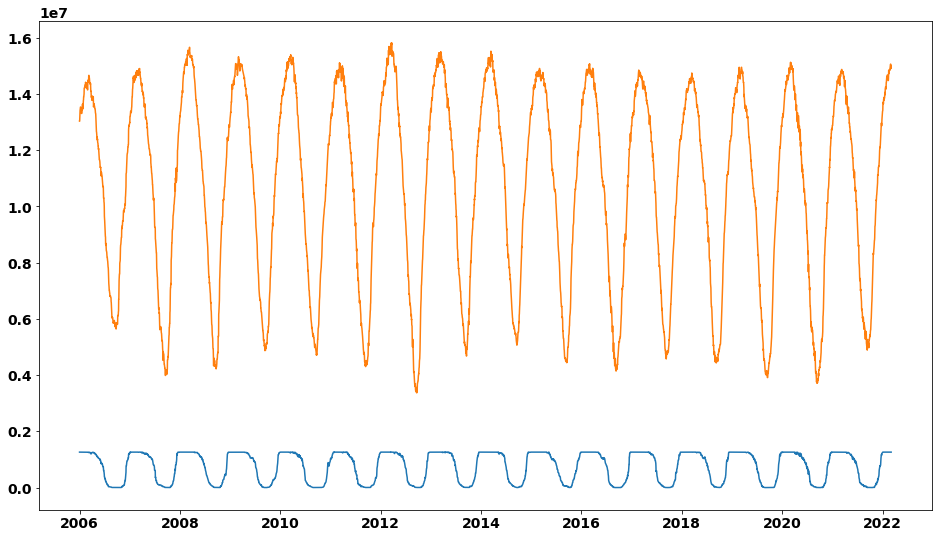

In [42]:
plt.plot(df_hb['date'], df_hb['HB_extent'])
plt.plot(df_hb['date'], df_hb['total_extent_north']);

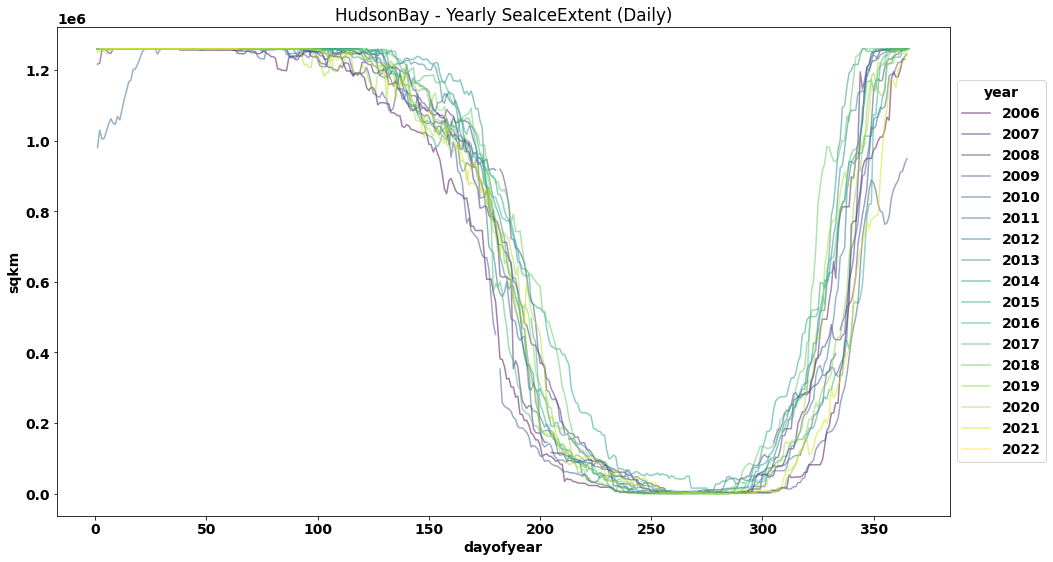

In [43]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=df_hb[['year', 'dayofyear', 'HB_extent']], index='dayofyear', columns='year') \
    ['HB_extent'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='HudsonBay - Yearly SeaIceExtent (Daily)', ylabel=r'sqkm');

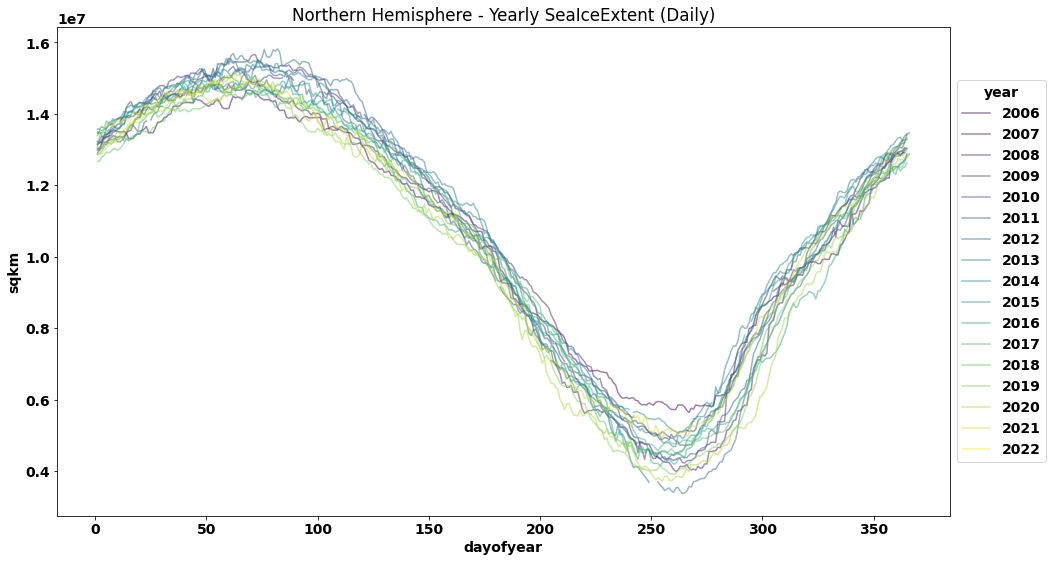

In [44]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=df_hb[['year', 'dayofyear', 'total_extent_north']], index='dayofyear', columns='year') \
    ['total_extent_north'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Northern Hemisphere - Yearly SeaIceExtent (Daily)', ylabel=r'sqkm');

In [45]:
# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name
import seaborn as sns

In [46]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#1E4485', '#99D04A','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

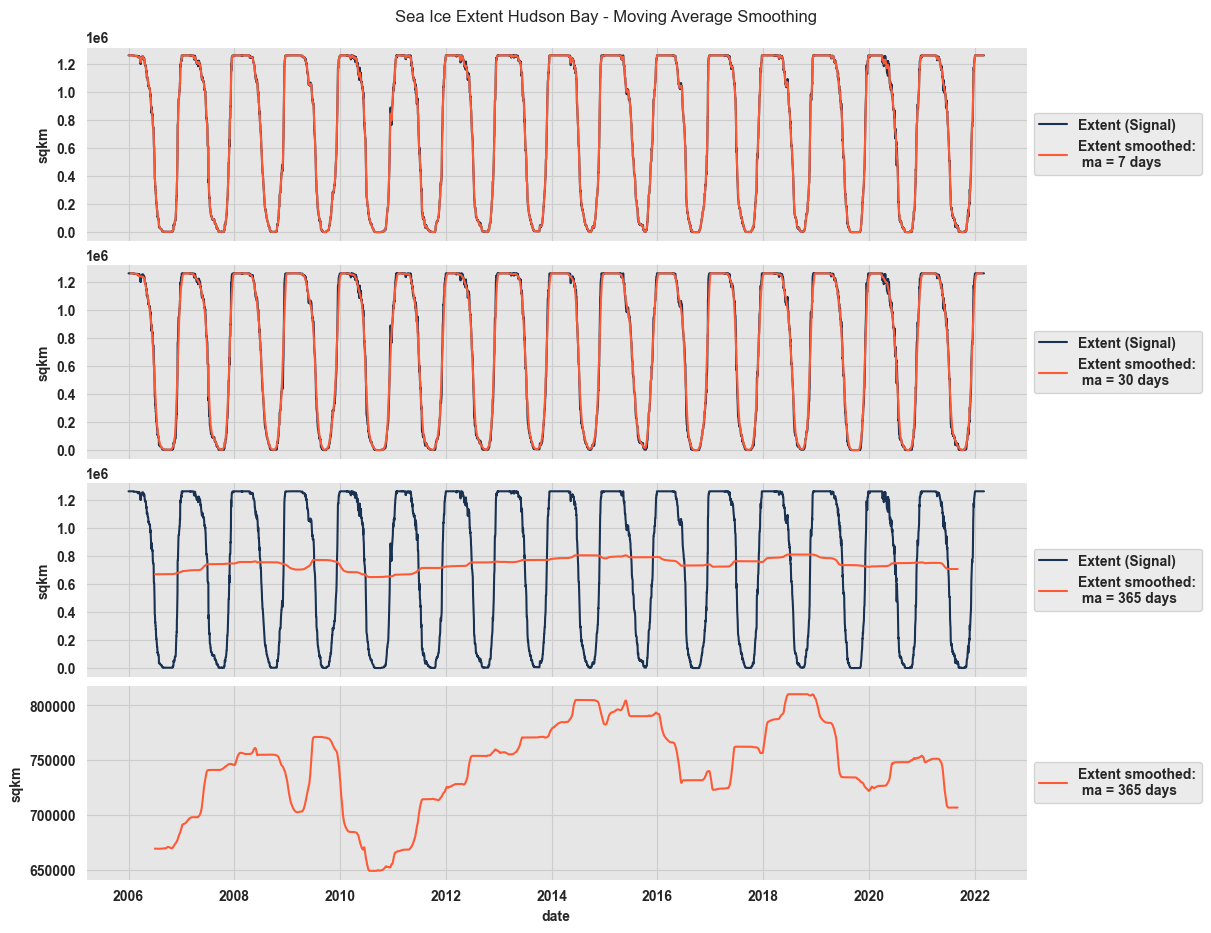

In [47]:
# Plot moving average of different length (week, month, year)
ma = [7, 30, 365]

smooth_daily_df_hb = df_hb
#    .reset_index() \
#    .assign(date = lambda x: x['date'].transform(pd.to_datetime))

# Smooth and plot
fig, ax = plt.subplots(4, 1, figsize=(12, 9), constrained_layout=True,sharex=True)

for i, m in enumerate(ma):

    smooth_daily_df_hb[f'extent_smooth_ma_{m}'] = smooth_daily_df_hb['HB_extent'].rolling(window=m,center=True).mean()

    sns.lineplot(x='date', y='HB_extent', label='Extent (Signal)', data=smooth_daily_df_hb,  ax=ax[i])
    sns.lineplot(x='date', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=NF_ORANGE, ax=ax[i])


    ax[i].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].set(title='', ylabel=r'sqkm');
    
sns.lineplot(x='date', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=sns_c[1], ax=ax[i+1])
ax[i+1].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
ax[i+1].set(title='', ylabel=r'sqkm');
    
    
plt.suptitle('Sea Ice Extent Hudson Bay - Moving Average Smoothing', y=1.02);

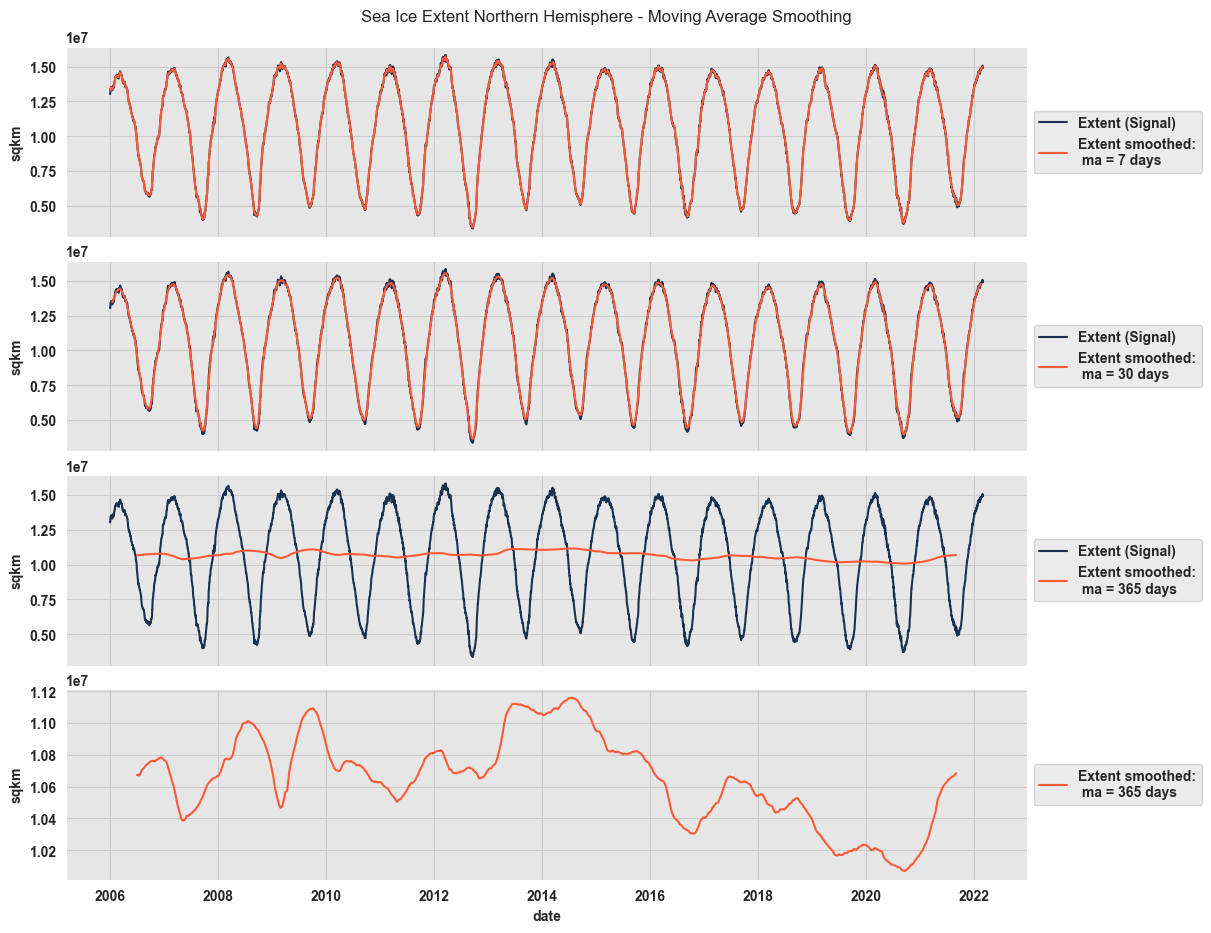

In [48]:
# Plot moving average of different length (week, month, year)
ma = [7, 30, 365]

smooth_daily_df_hb = df_hb
#    .reset_index() \
#    .assign(date = lambda x: x['date'].transform(pd.to_datetime))

# Smooth and plot
fig, ax = plt.subplots(4, 1, figsize=(12, 9), constrained_layout=True,sharex=True)

for i, m in enumerate(ma):

    smooth_daily_df_hb[f'extent_smooth_ma_{m}'] = smooth_daily_df_hb['total_extent_north'].rolling(window=m,center=True).mean()

    sns.lineplot(x='date', y='total_extent_north', label='Extent (Signal)', data=smooth_daily_df_hb,  ax=ax[i])
    sns.lineplot(x='date', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=NF_ORANGE, ax=ax[i])


    ax[i].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].set(title='', ylabel=r'sqkm');
    
sns.lineplot(x='date', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=sns_c[1], ax=ax[i+1])
ax[i+1].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
ax[i+1].set(title='', ylabel=r'sqkm');
    
    
plt.suptitle('Sea Ice Extent Northern Hemisphere - Moving Average Smoothing', y=1.02);

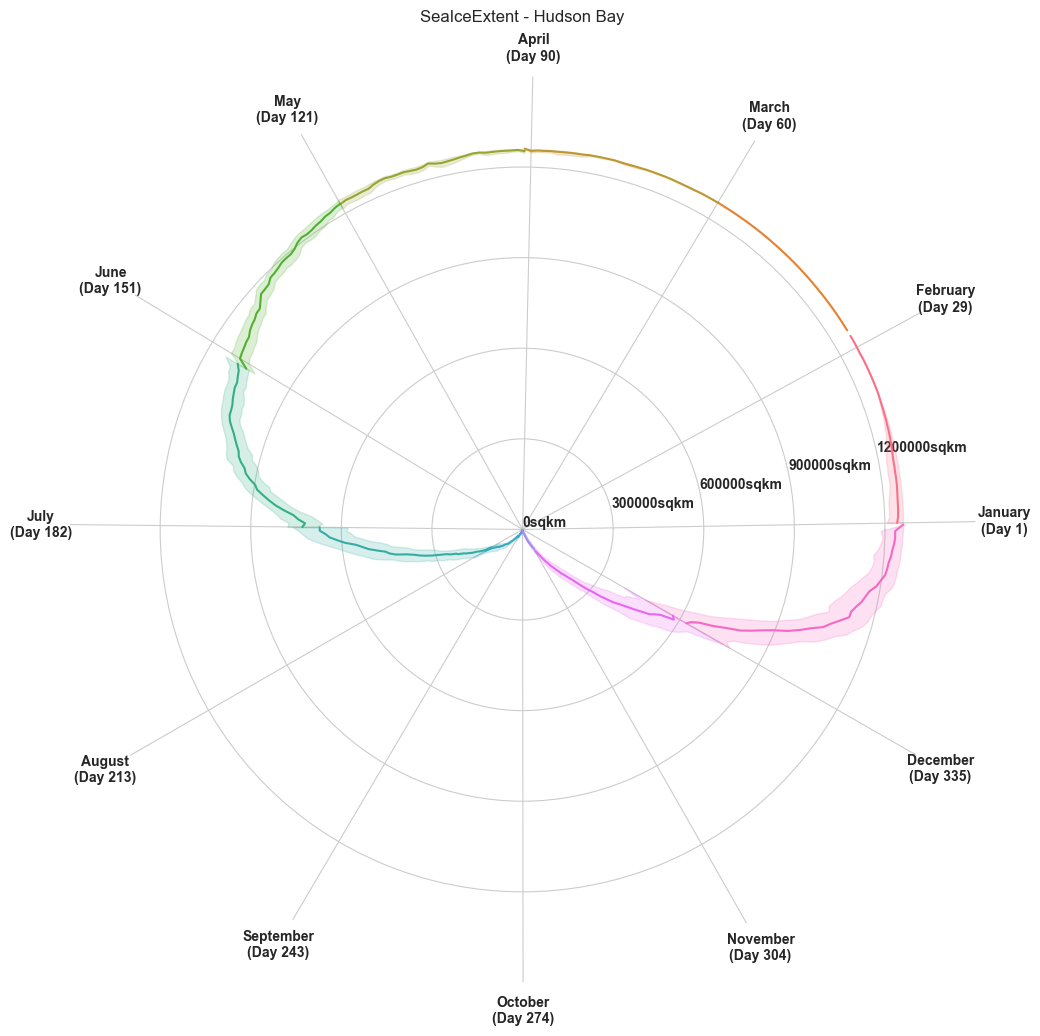

In [49]:
# Polar plot for seasonality 

ax = plt.subplot(111, projection='polar')

# Convert and plot data
df_hb \
    .assign(day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='HB_extent', 
        hue='month',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

days_per_month=[monthrange(2021, i)[1] for i in range(1,13)]                    #findout how many days each month has  
month_theta=(np.array(days_per_month).cumsum()-days_per_month[0]+1)*2*np.pi/365.25 #find the starting day for each month and turn it into an angle 
month_label=[month_name[i] for i in range(1,13)]
month_label=[label+'\n(Day ' +str(int(month_theta[ind]*365.25/np.pi/2)) +')' for ind,label in enumerate(month_label)]

ax.set_facecolor('white')
ax.spines.clear()
ax.set_xticks(month_theta)
ax.set_xticklabels(month_label)
ax.set_ylim(0,1500000)
ax.set_yticks(yt:=[0,300000,600000,900000,1200000])
ax.set_yticklabels([str(t)+'sqkm' for t in yt], rotation = 45)
ax.set_rlabel_position(12) 
ax.xaxis.set_tick_params(which='major',pad=10)

ax.set_rorigin(-5)
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend().set_visible(False)

ax.set_title('SeaIceExtent - Hudson Bay', va='bottom');
ax.figure.set_figwidth(12)
ax.figure.set_figheight(12)

#ax.figure.savefig("Basel_Temp_polar.png")

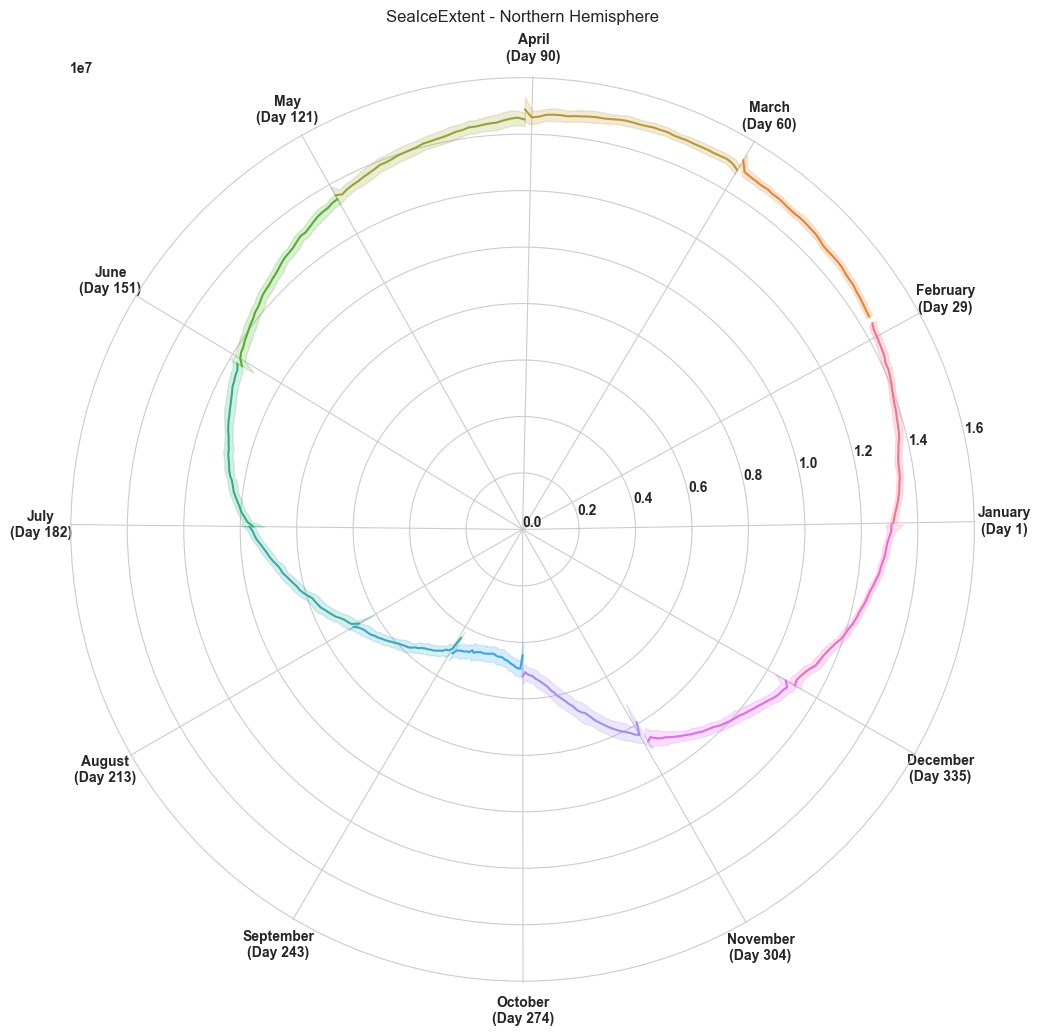

In [50]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
df_hb \
    .assign(day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='total_extent_north', 
        hue='month',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

days_per_month=[monthrange(2021, i)[1] for i in range(1,13)]                    #findout how many days each month has  
month_theta=(np.array(days_per_month).cumsum()-days_per_month[0]+1)*2*np.pi/365.25 #find the starting day for each month and turn it into an angle 
month_label=[month_name[i] for i in range(1,13)]
month_label=[label+'\n(Day ' +str(int(month_theta[ind]*365.25/np.pi/2)) +')' for ind,label in enumerate(month_label)]

ax.set_facecolor('white')
ax.spines.clear()
ax.set_xticks(month_theta)
ax.set_xticklabels(month_label)
#ax.set_ylim(0,1500000)
#ax.set_yticks(yt:=[0,300000,600000,900000,1200000])
#ax.set_yticklabels([str(t)+'sqkm' for t in yt], rotation = 45)
ax.set_rlabel_position(12) 
ax.xaxis.set_tick_params(which='major',pad=10)

ax.set_rorigin(-5)
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend().set_visible(False)

ax.set_title('SeaIceExtent - Northern Hemisphere', va='bottom');
ax.figure.set_figwidth(12)
ax.figure.set_figheight(12)

#ax.figure.savefig("Basel_Temp_polar.png")

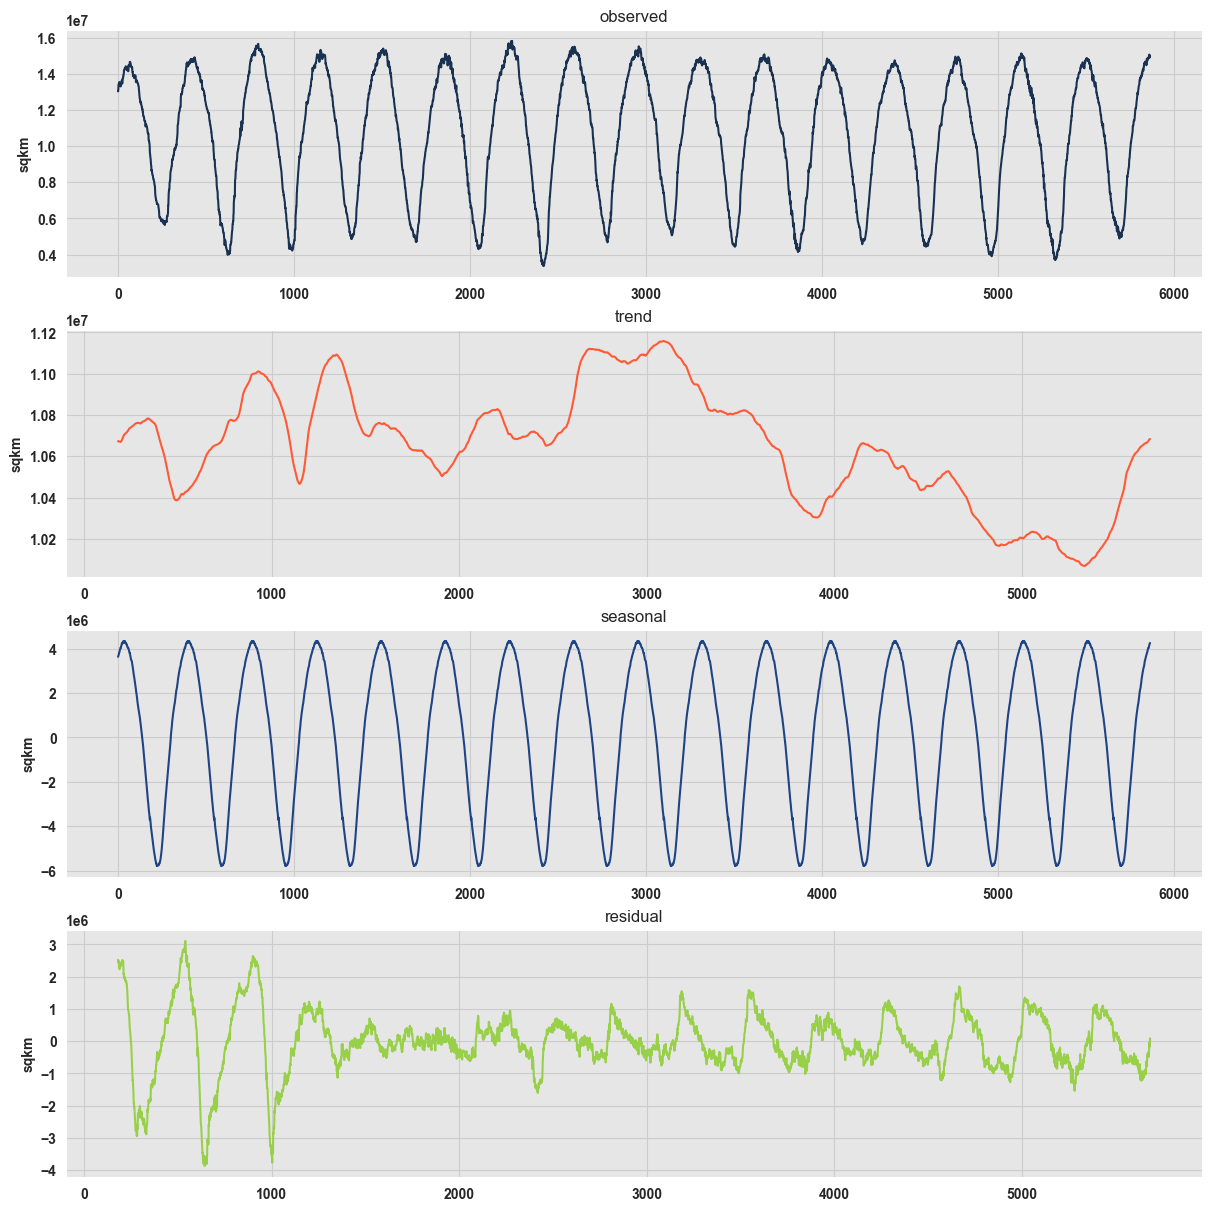

In [51]:
# We use the parameter `period` = 365 to extract the yearly seasonality. 
seas_decomp_yearly = seasonal_decompose(
    x=df_hb['total_extent_north'], 
    model='additive', 
    period=365
)

# Plot data
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

seas_decomp_yearly.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='observed', ylabel=r'sqkm')
seas_decomp_yearly.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend', ylabel=r'sqkm')
seas_decomp_yearly.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal', ylabel=r'sqkm')
seas_decomp_yearly.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual', ylabel=r'sqkm');

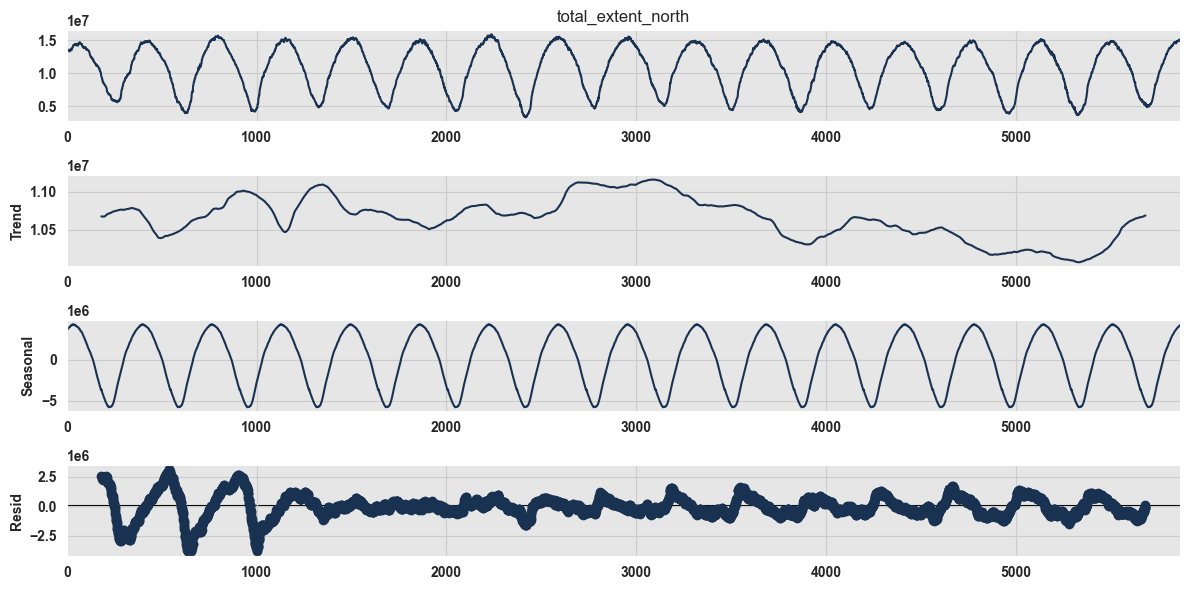

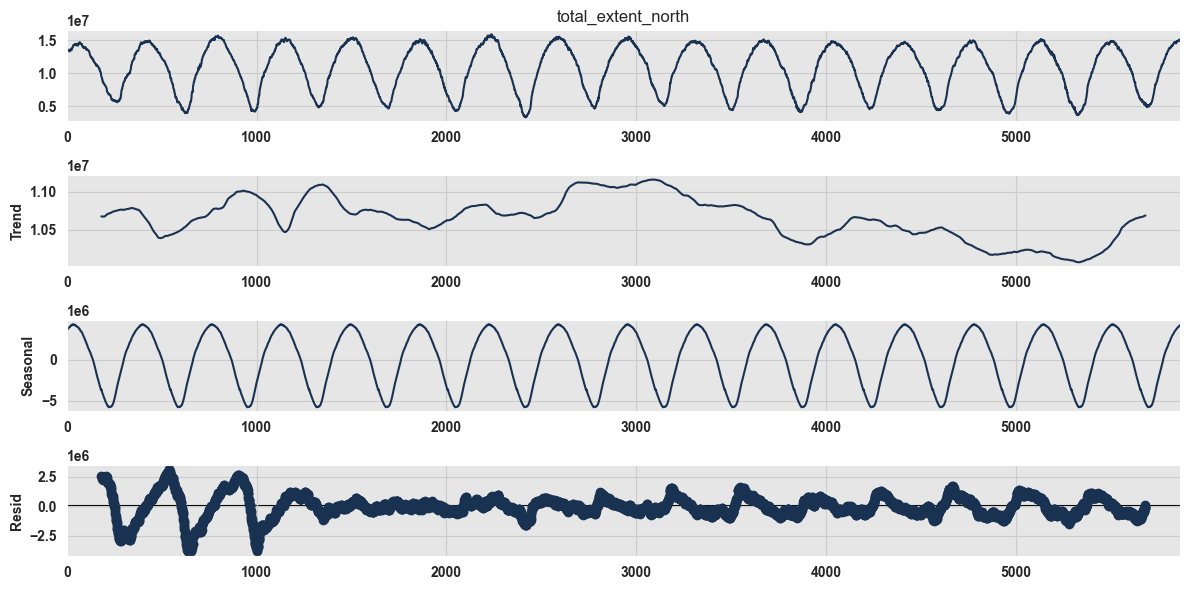

In [52]:
seas_decomp_yearly.plot()

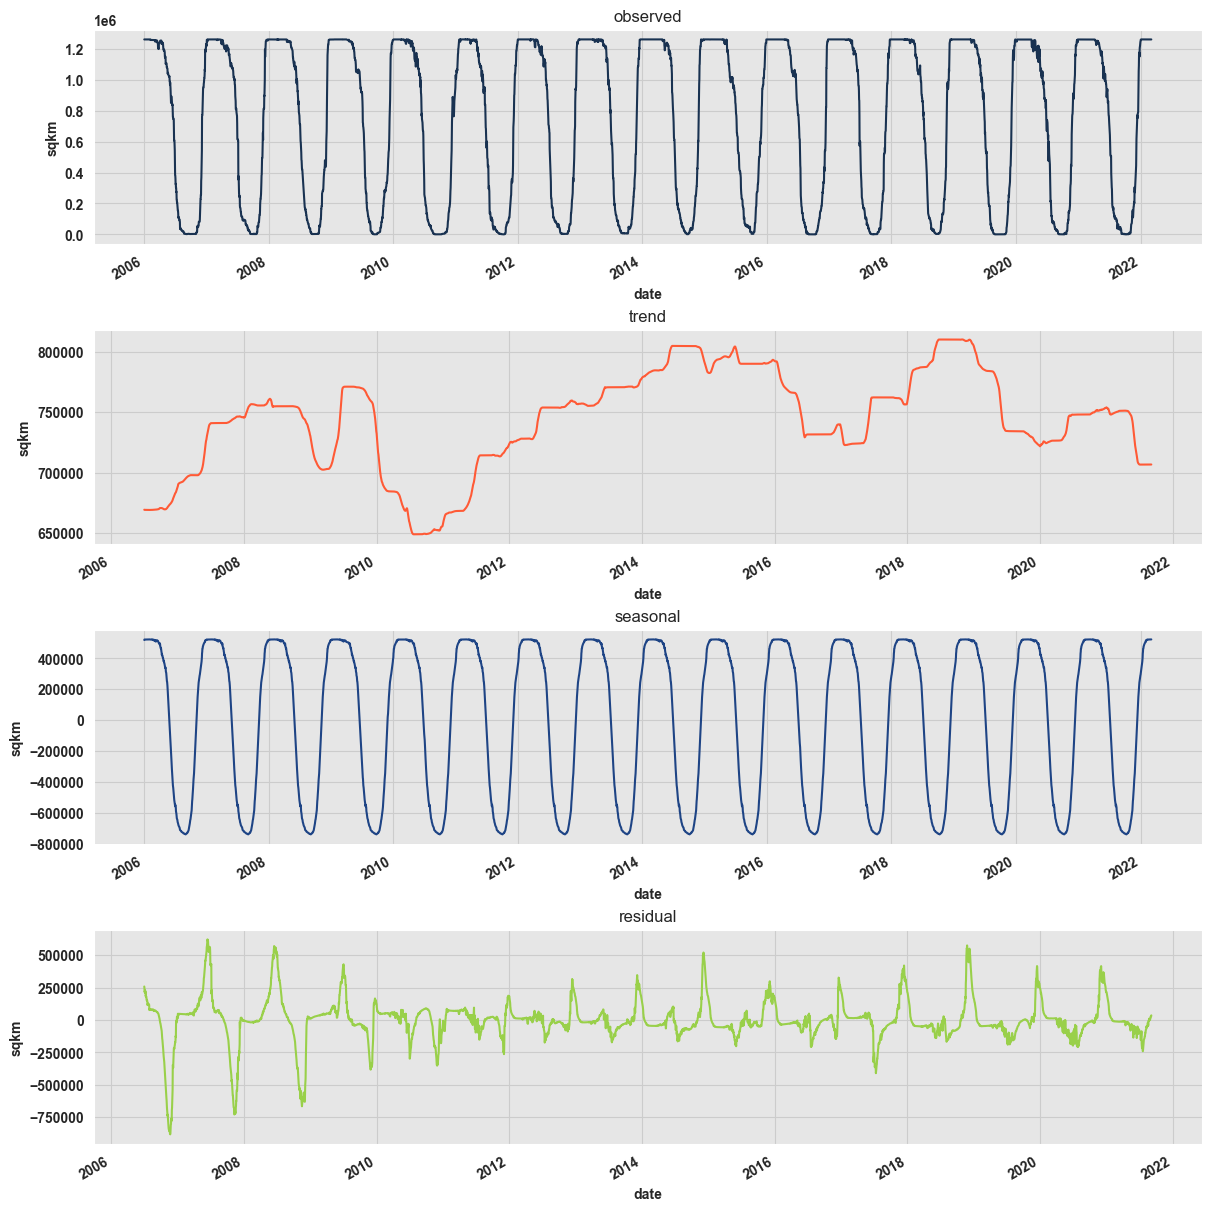

In [53]:
df_hudson = df_hb[['date','HB_extent']]
df_hudson.to_csv('HudsonBay.csv', encoding='utf-8', index=False)

data=pd.read_csv('HudsonBay.csv',header=0,squeeze=True,index_col=[0],parse_dates=[0])

# We use the parameter `period` = 365 to extract the yearly seasonality. 
seas_decomp_yearly = seasonal_decompose(
    data, 
    model='additive', 
    period=365
)

# Plot data
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

seas_decomp_yearly.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='observed', ylabel=r'sqkm')
seas_decomp_yearly.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend', ylabel=r'sqkm')
seas_decomp_yearly.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal', ylabel=r'sqkm')
seas_decomp_yearly.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual', ylabel=r'sqkm');